# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_200.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,2,0.436414,-1.576482,2.176638,1.046650,-0.967788,-0.332760,-0.586029,1.430570,-0.895583,...,-0.928760,0.075799,-0.263159,-0.655430,1.285033,1.158913,-0.501004,-1.361494,0.612884,0.746754
1,1,-0.032149,-0.995621,1.888060,1.284731,0.079140,0.064063,-0.199813,1.521006,0.564534,...,0.483468,-0.893442,0.575146,-0.778792,0.324170,0.177823,-1.233956,-1.483099,-0.341608,-0.996777
2,2,0.476933,-2.010775,1.879018,0.383090,0.207985,-0.992632,0.020097,0.387833,-1.122965,...,0.017044,0.602836,-1.916266,1.144584,1.069570,0.535930,-0.897938,-1.371405,-0.231251,-0.274360
3,0,0.547395,-0.711453,1.527116,1.052659,0.077064,0.006284,-0.112697,1.186751,0.211799,...,0.633414,-0.524010,0.202187,-0.838269,-0.029785,0.492356,-1.486459,-1.970962,0.530672,-0.985897
4,1,-0.624718,-2.406139,2.824231,-0.012635,-1.314704,-0.748785,0.687588,2.262579,-0.263327,...,0.454670,-0.789785,-0.452545,1.738423,0.543774,0.753638,-1.839001,-0.347618,0.589409,-1.081583


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.436414 -1.576482  2.176638  1.046650 -0.967788 -0.332760 -0.586029   
1   -0.032149 -0.995621  1.888060  1.284731  0.079140  0.064063 -0.199813   
2    0.476933 -2.010775  1.879018  0.383090  0.207985 -0.992632  0.020097   
3    0.547395 -0.711453  1.527116  1.052659  0.077064  0.006284 -0.112697   
4   -0.624718 -2.406139  2.824231 -0.012635 -1.314704 -0.748785  0.687588   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.152039 -1.448956  1.631890  0.438465 -0.797802 -0.450635 -0.031156   
177  1.139950 -1.364696  0.767903  0.954542  0.358079 -0.439770  0.195097   
178  0.291298 -2.023891  1.954019  1.072944 -0.490579 -0.466329  0.094765   
179  0.102469 -0.451807  1.057516  0.105644 -0.375693 -0.814802  0.114747   
180  0.794935 -1.928761  0.771840  0.929302 -0.237190 -0.890115  0.127341   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'random_state':[125],
              'n_estimators': [15, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 14, 16, 20, 30, 40, 50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 14, 16, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [15, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(min_samples_leaf=3, min_samples_split=8, n_estimators=15,
                       random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5566502463054188


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9236111111111112
Final accuracy on the testing dataset: 0.5405405405405406


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[65  0  2]
 [ 3 20  2]
 [ 4  0 48]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [2 0 2 0 0 2 0 0 0 0 2 0 1 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 1 2 2 2 2 2 0 1 2
 0 0 0 0 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 0 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 2 0 1 0 1 2 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 0 2 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       1.00      0.80      0.89        25
           2       0.92      0.92      0.92        52

    accuracy                           0.92       144
   macro avg       0.94      0.90      0.92       144
weighted avg       0.93      0.92      0.92       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[13  0  5]
 [ 1  1  4]
 [ 7  0  6]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 2 2 0 2 2 2 0 2 0 2 2 0 2 0 0 2 0 0 0 0 2 1 2 0 2 0 0 0 0 0 0 0 0 2 2 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67        18
           1       1.00      0.17      0.29         6
           2       0.40      0.46      0.43        13

    accuracy                           0.54        37
   macro avg       0.67      0.45      0.46        37
weighted avg       0.60      0.54      0.52        37



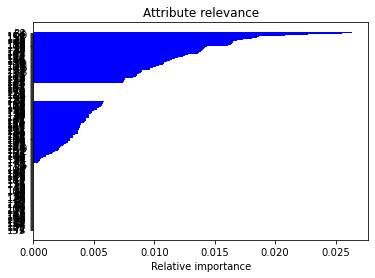

0 = 0.0022161260357891873
1 = 0.00665738607220284
2 = 0.002080236278991419
3 = 0.010782726733464849
4 = 0.0
5 = 0.0
6 = 0.010111540918046962
7 = 0.0
8 = 0.008954833993153555
9 = 0.02271126849527405
10 = 0.014081311889265277
11 = 0.0
12 = 0.0
13 = 0.014212767612124911
14 = 0.0
15 = 0.008270024240295973
16 = 0.0
17 = 0.0
18 = 0.01647282738320595
19 = 0.0
20 = 0.017321263694542618
21 = 0.0037679403227962164
22 = 0.0017901714998731686
23 = 0.0
24 = 0.00369009640593626
25 = 0.005262067354109446
26 = 0.005822424026752108
27 = 0.003429595368902388
28 = 0.0005412506272305451
29 = 0.0
30 = 0.016058153301082814
31 = 0.004609155456297513
32 = 0.0005526227996153625
33 = 0.0
34 = 0.0
35 = 0.0030596640588793356
36 = 0.0
37 = 0.0
38 = 0.026360868683343426
39 = 0.0
40 = 0.0
41 = 0.0
42 = 0.009673009618127178
43 = 0.006054868258261626
44 = 0.014035825277813685
45 = 0.0013018517875554199
46 = 0.0
47 = 0.008983496560867875
48 = 0.016540050050758415
49 = 0.009926683160340977
50 = 0.0007785160191361288
51 

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.